# Fiber tracking
This notebook demonstrates the use of the FiberTracker class. It is intended for tracking fiber in 3D volumetric scans of for example unidirectional fiber composite materials where each fiber can be detected as a peak in the image. This is for example the case if our InSegt tool has been used for detecting individual fibers.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/abdahl/3Dtools/blob/main/fiber_tracker/fiber_tracking.ipynb)

In [1]:
import os
import wget
if not os.path.isfile('track_helper.py'):
  wget.download('https://raw.githubusercontent.com/abdahl/3Dtools/main/track_helper/track_helper.py') 

if not os.path.isdir('data'):
  os.mkdir('data')
  wget.download('https://data.qim.dk/fiber_data/data/vol_center_probability.tif') 
  os.rename('vol_center_probability.tif', 'data/vol_center_probability.tif')

import tifffile
import numpy as np
import track_helper

In [7]:
# Run example of fiber tracking
dir_name = 'data/'
V = tifffile.imread(f'{dir_name}vol_center_probability.tif')

# Make a fiber tracker object
fib_tracker = track_helper.fibertracker()

# Track fibers in one volume - output is a list of tracks and
# a volume with the centerlines for visualization
tracks, center_vol = fib_tracker(V)

# Save the centerline volume
out_dir = 'results/'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

tifffile.imwrite(f'{out_dir}center_vol.tif', center_vol)


In [8]:
# Show results
import plotly.graph_objects as go

fig = go.Figure()
for track in tracks:
    fig.add_trace(go.Scatter3d(x=track[:,0], y=track[:,1], z=track[:,2], mode='lines'))
fig.update_layout(showlegend=False)
fig.update_traces(line=dict(width=5))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()


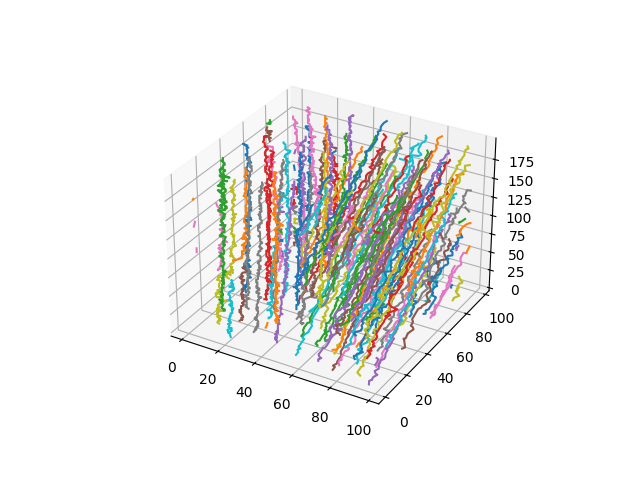

In [9]:
# Show results using matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for track in tracks:
    ax.plot(track[:,0], track[:,1], track[:,2], '-')
plt.show()
